In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, auc, precision_recall_curve
from sklearn.model_selection import StratifiedKFold, cross_val_score
from sklearn.metrics import roc_curve, auc




import warnings
warnings.filterwarnings('ignore')

# تحميل البيانات
df = pd.read_csv(r"D:\task 3 data\healthcare_dataset.csv")

# عرض أول 5 صفوف
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


In [51]:
# -----------------------------------------
# 2. تنظيف البيانات وإخفاء المعلومات الحساسة
# -----------------------------------------

# حذف الأعمدة الحساسة
df = df.drop(columns=["Name", "Doctor", "Hospital", "Insurance Provider"])

# حساب مدة الإقامة
df['Date of Admission'] = pd.to_datetime(df['Date of Admission'])
df['Discharge Date'] = pd.to_datetime(df['Discharge Date'])
df['Stay Duration'] = (df['Discharge Date'] - df['Date of Admission']).dt.days
df = df.drop(columns=["Date of Admission", "Discharge Date"])

# عرض البيانات بعد التنظيف
df.head()


,Age,Gender,Blood Type,Medical Condition,Billing Amount,Room Number,Admission Type,Medication,Test Results,Stay Duration
0,81,Female,O-,Diabetes,37490.983364,146,Elective,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,47304.064845,404,Emergency,Lipitor,Normal,14
2,61,Male,B-,Obesity,36874.896997,292,Emergency,Lipitor,Normal,30
3,49,Male,B-,Asthma,23303.322092,480,Urgent,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,18086.344184,477,Urgent,Paracetamol,Normal,24


In [52]:
# ------------------------------
# 3. تجهيز البيانات (Encoding + Scaling)
# ------------------------------

# ترميز البيانات النصية
categorical_cols = ['Gender', 'Blood Type', 'Admission Type', 'Medication', 'Test Results']
df_encoded = pd.get_dummies(df, columns=categorical_cols)

# ترميز الهدف (Medical Condition)
le = LabelEncoder()
df_encoded['Medical Condition'] = le.fit_transform(df_encoded['Medical Condition'])

# فصل المتغيرات عن الهدف
X = df_encoded.drop(columns=["Medical Condition"])
y = df_encoded["Medical Condition"]

# تقسيم البيانات
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مقياس الخصائص
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [53]:
# ---------------------
# 4. بناء وتجربة النماذج
# ---------------------

# 🎯 Logistic Regression
lr_model = LogisticRegression()
lr_model.fit(X_train_scaled, y_train)
y_pred_lr = lr_model.predict(X_test_scaled)

print("Logistic Regression Report:")
print(classification_report(y_test, y_pred_lr))


Logistic Regression Report:
              precision    recall  f1-score   support

           0       0.18      0.19      0.19       319
           1       0.15      0.20      0.17       332
           2       0.17      0.17      0.17       363
           3       0.16      0.15      0.15       303
           4       0.18      0.24      0.20       336
           5       0.24      0.07      0.11       347

    accuracy                           0.17      2000
   macro avg       0.18      0.17      0.17      2000
weighted avg       0.18      0.17      0.17      2000



In [54]:
# 🌲 Decision Tree
tree_model = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

print("Decision Tree Report:")
print(classification_report(y_test, y_pred_tree))


Decision Tree Report:
              precision    recall  f1-score   support

           0       0.29      0.02      0.04       319
           1       0.16      0.94      0.28       332
           2       0.20      0.01      0.02       363
           3       0.00      0.00      0.00       303
           4       0.14      0.01      0.03       336
           5       0.25      0.01      0.02       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.06      2000
weighted avg       0.18      0.17      0.06      2000



In [55]:

# تدريب النموذج
tree_clf = DecisionTreeClassifier(max_depth=5, random_state=42)
tree_clf.fit(X_train, y_train)


DecisionTreeClassifier(max_depth=5, random_state=42)

In [56]:
# 🌳 Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Report:")
print(classification_report(y_test, y_pred_rf))


Random Forest Report:
              precision    recall  f1-score   support

           0       0.18      0.20      0.19       319
           1       0.17      0.20      0.18       332
           2       0.16      0.14      0.15       363
           3       0.15      0.15      0.15       303
           4       0.18      0.19      0.18       336
           5       0.18      0.14      0.16       347

    accuracy                           0.17      2000
   macro avg       0.17      0.17      0.17      2000
weighted avg       0.17      0.17      0.17      2000



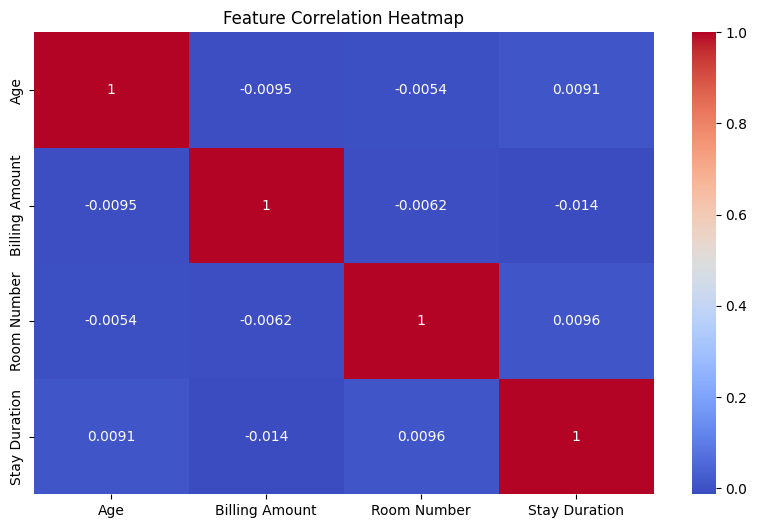

In [57]:

def plot_correlation_heatmap(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
    plt.title("Feature Correlation Heatmap")
    plt.show()
# لو عندك الداتا مثلاً في df:
plot_correlation_heatmap(df)



In [58]:


def optimize_hyperparameters(model, X, y):
    param_grid = {
        'n_estimators': [50, 100, 150],
        'max_depth': [3, 5, 10, None],
        'min_samples_split': [2, 5],
    }
    grid = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
    grid.fit(X, y)
    return grid.best_estimator_
from sklearn.ensemble import RandomForestClassifier

# خليه يدور على أفضل باراميترز للـ RandomForest
best_model = optimize_hyperparameters(RandomForestClassifier(), X_train, y_train)

# استخدمه للتدريب بعد كده
best_model.fit(X_train, y_train)



RandomForestClassifier(max_depth=5, min_samples_split=5, n_estimators=50)

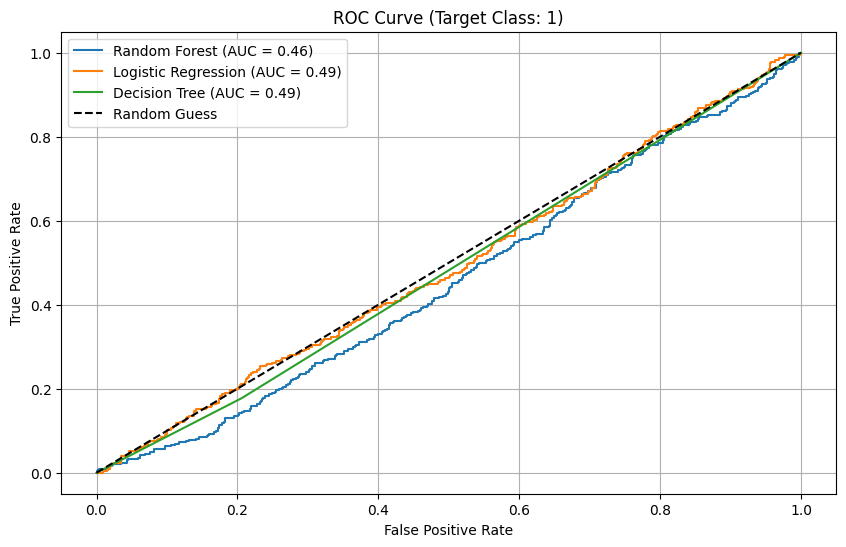

In [59]:

# ✅ Binary classification: "هل المريض عنده المرض 1 أم لا؟"
target_class = 1
y_train_binary = (y_train_enc == target_class).astype(int)
y_test_binary = (y_test_enc == target_class).astype(int)

# ✅ إعادة تدريب الموديلات للتصنيف الثنائي
log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train, y_train_binary)

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train_binary)

# ✅ تجميع الموديلات
models = {
    "Random Forest": best_model,
    "Logistic Regression": log_reg,
    "Decision Tree": tree_model
}

# ✅ دالة لرسم ROC curves
def plot_model_comparisons(models, X_test, y_test):
    plt.figure(figsize=(10, 6))
    for name, model in models.items():
        y_score = model.predict_proba(X_test)[:, 1]
        fpr, tpr, _ = roc_curve(y_test, y_score)
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve (Target Class: {target_class})')
    plt.legend()
    plt.grid()
    plt.show()

# ✅ تشغيل الدالة
plot_model_comparisons(models, X_test, y_test_binary)


In [60]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

def evaluate_with_cross_validation(model, X, y):
    skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
    scores = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Cross-Validation Scores: {scores}")
    print(f"Mean Accuracy: {scores.mean():.4f}")
    return scores
# لتقييم موديل مثلاً Random Forest
evaluate_with_cross_validation(best_model, X_train, y_train)



Cross-Validation Scores: [0.1475   0.169375 0.169375 0.165625 0.171875]
Mean Accuracy: 0.1648


array([0.1475  , 0.169375, 0.169375, 0.165625, 0.171875])

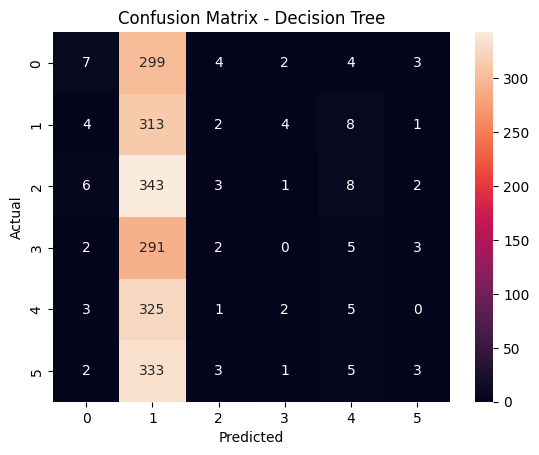

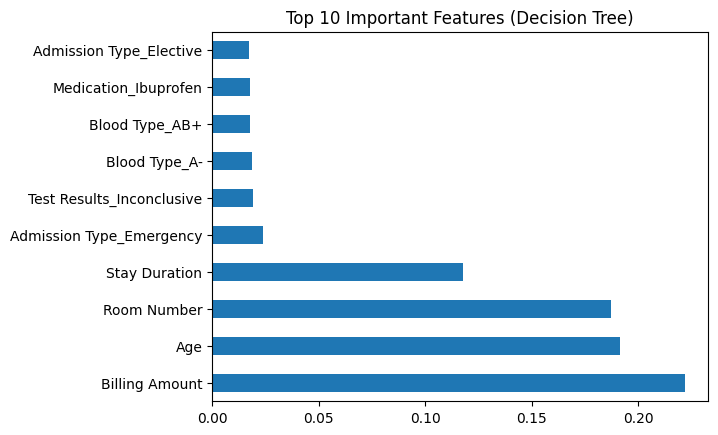

In [61]:
# -----------------------------
# 5. تفسير النموذج وخصائصه
# -----------------------------

# رسم مصفوفة الالتباس
sns.heatmap(confusion_matrix(y_test, y_pred_tree), annot=True, fmt='d')
plt.title("Confusion Matrix - Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# عرض أهم الخصائص في نموذج الشجرة
feature_importance = pd.Series(tree_model.feature_importances_, index=X.columns)
feature_importance.nlargest(10).plot(kind='barh')
plt.title("Top 10 Important Features (Decision Tree)")
plt.show()


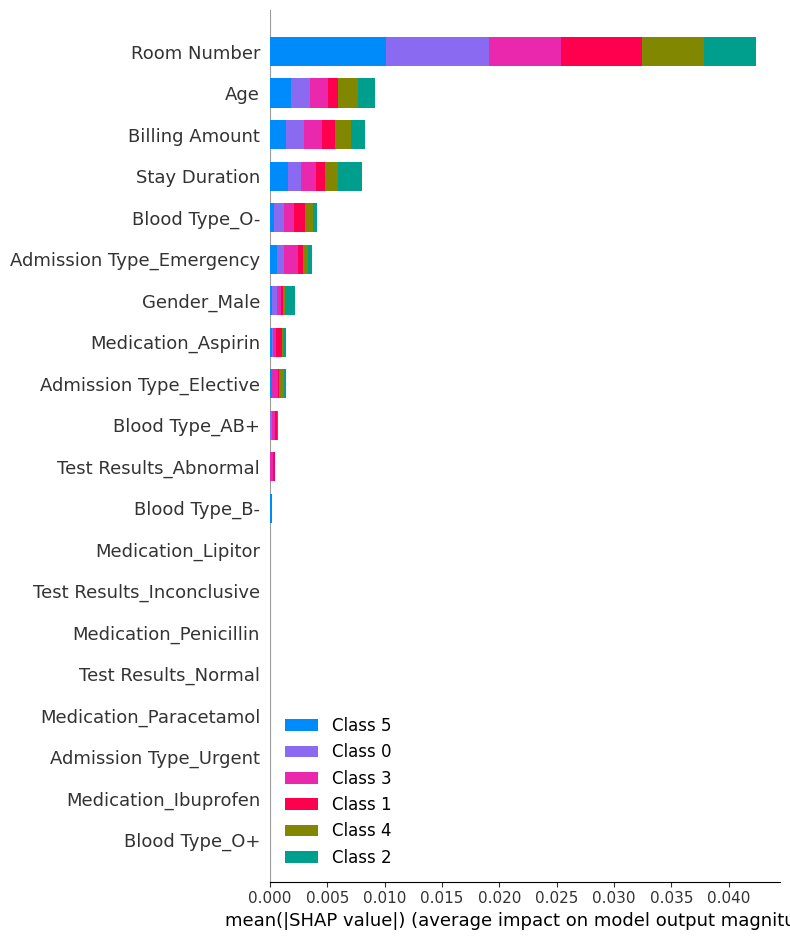

In [62]:
# ✅ تأكد إنك ثبتت المكتبة أولًا (مرة واحدة فقط)
# !pip install shap

import shap

# ✅ إنشاء الكائن الخاص بشرح النموذج
explainer = shap.TreeExplainer(tree_clf)

# ✅ حساب قيم SHAP للعينة المستخدمة في الاختبار
shap_values = explainer.shap_values(X_test)

# ✅ عرض ملخص الخصائص الأكثر تأثيرًا (تحتاج واجهة رسومية)
shap.summary_plot(shap_values, X_test, plot_type="bar")
